In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess
sns.set_palette("rocket")
sns.set_style("dark")

In [13]:
stock_df = pd.read_csv("/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv",index_col="Date",parse_dates=True)
stock_df.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476


---

# EDA

<Axes: title={'center': 'Quater Start Stock Price (HIGH)'}, xlabel='Date', ylabel='High'>

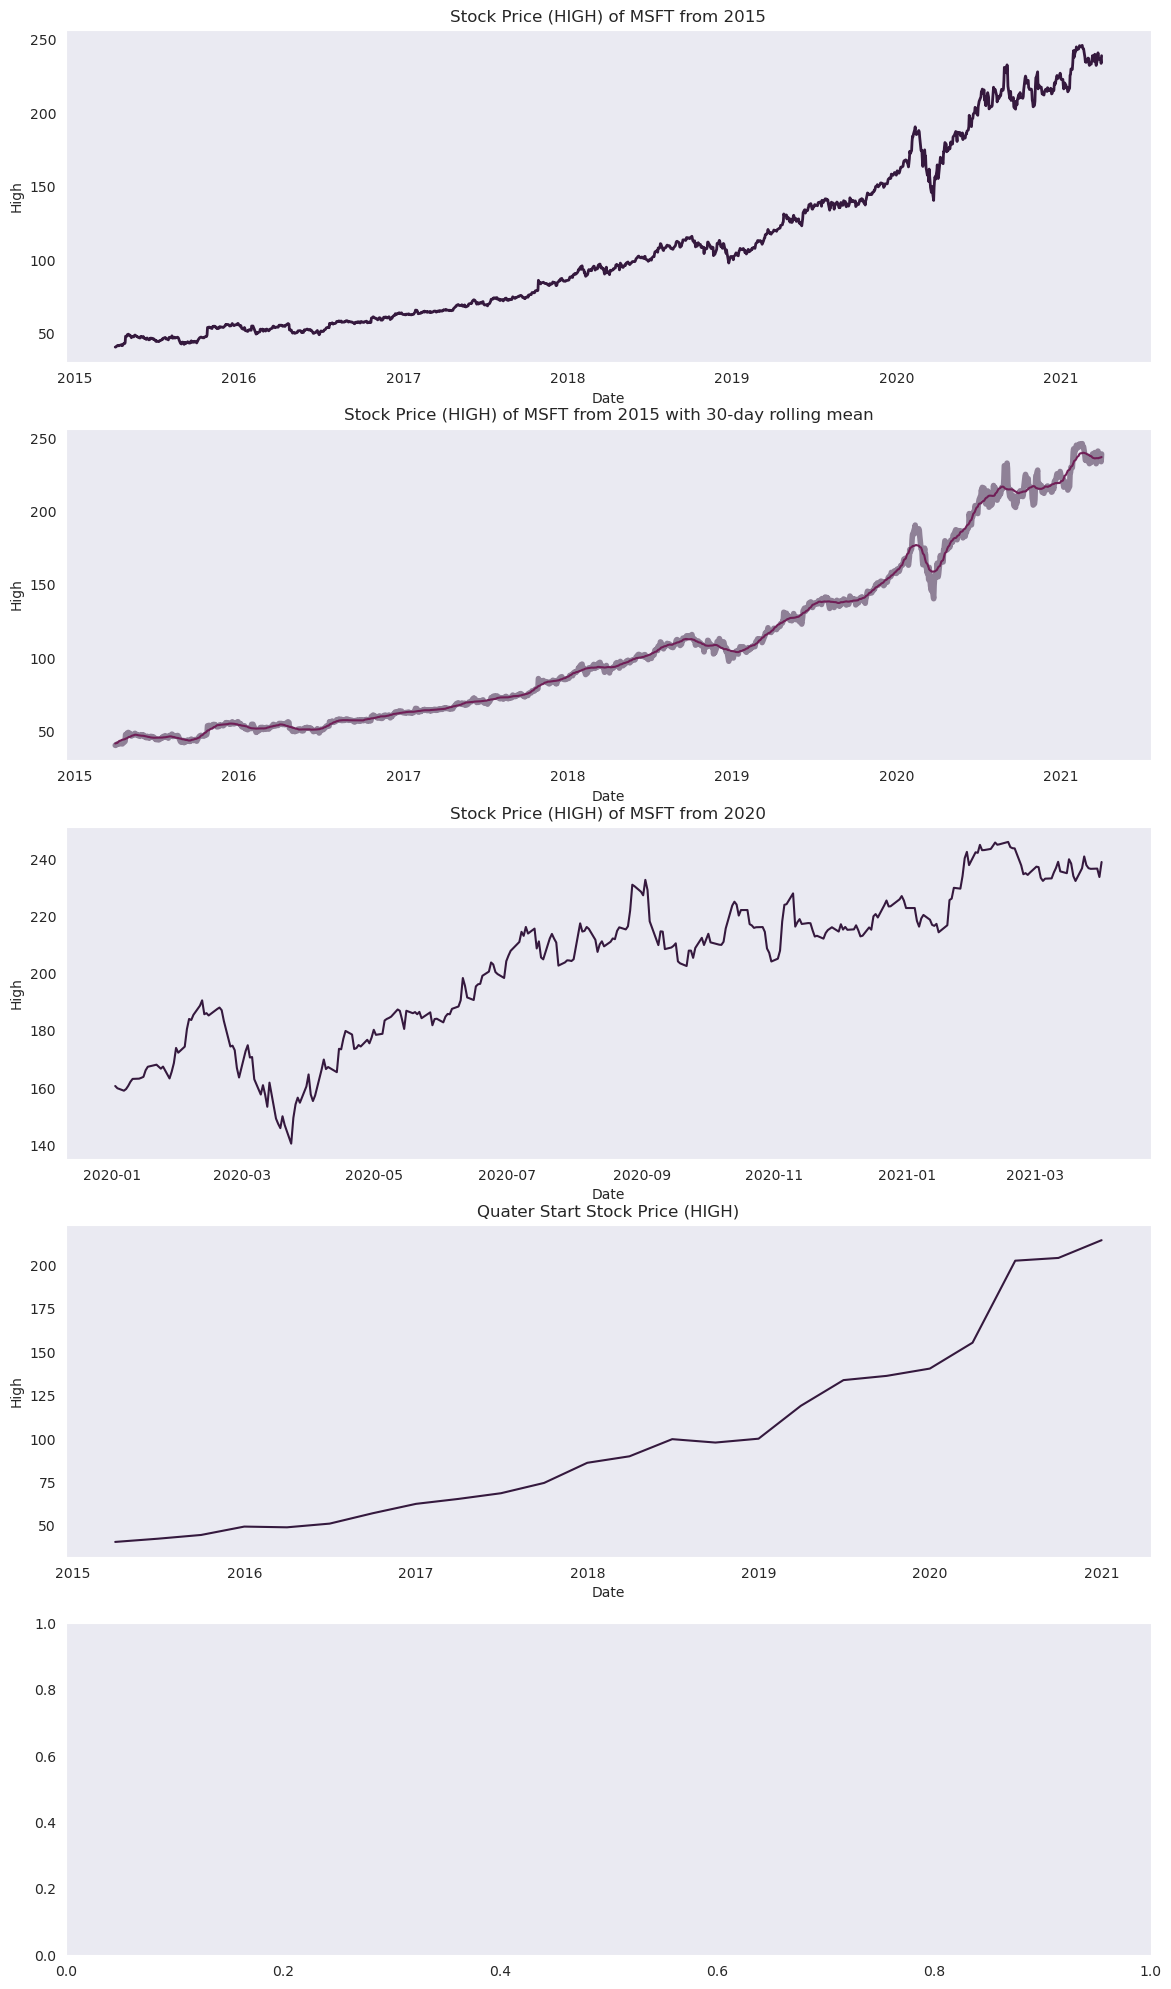

In [78]:
fig,axes = plt.subplots(5,1,figsize=(14,25))

plt.subplot(5,1,1)
sns.lineplot(stock_df["High"],linewidth=2)
plt.title("Stock Price (HIGH) of MSFT from 2015");

# Time Rolling
plt.subplot(5,1,2)
sns.lineplot(stock_df["High"],alpha=0.5,linewidth=4)
sns.lineplot(stock_df["High"].rolling(window=30,center=True,min_periods=15).mean(),palette="rocket")
plt.title("Stock Price (HIGH) of MSFT from 2015 with 30-day rolling mean");

# Limits to DateIndex
plt.subplot(5,1,3)
sns.lineplot(stock_df[stock_df.index>np.datetime64("2020-01-01")]["High"])
plt.title("Stock Price (HIGH) of MSFT from 2020");

# Time Resampling
plt.subplot(5,1,4)
sns.lineplot(stock_df.resample("QS").min()["High"])
plt.title("Quater Start Stock Price (HIGH)");

plt.subplot(5,1,4)
